In [1]:
!pip install face_recognition
!pip install pillow
!pip install numpy

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=9c45e195cdd0812562069224d2e5e7a82174480e406241c825fdb02a5846b827
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
#face detection part
import face_recognition
image = face_recognition.load_image_file('./two_people.jpg') #load image
face_locations = face_recognition.face_locations(image) #detect face

#Array of coords of each face
print(face_locations)
print(f'There are {len(face_locations)} people in this image')

[(57, 964, 242, 778), (47, 408, 202, 253)]
There are 2 people in this image


In [7]:
#face recognition part
import face_recognition
obama_1=face_recognition.load_image_file('./obama.jpg')
#feature extractor
obama_1_encoding = face_recognition.face_encodings(obama_1)[0] 

unknown_im=face_recognition.load_image_file('./biden.jpg')
unknown_im_encoding = face_recognition.face_encodings(unknown_im)[0]

# feature compare
results = face_recognition.compare_faces([obama_1_encoding],unknown_im_encoding,tolerance=0.1)
if results[0]:
  print('This is obama')
else:
  print('This is not obama')

This is not obama


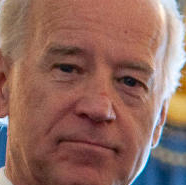

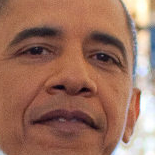

In [0]:
# face detection and show the part of face
from PIL import Image
import face_recognition
image = face_recognition.load_image_file('./two_people.jpg')
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
  top, right, bottom, left = face_location

  face_image = image[top:bottom, left:right]
  pil_image = Image.fromarray(face_image)
  display(pil_image)
  pil_image.save(f'{top}.jpg')

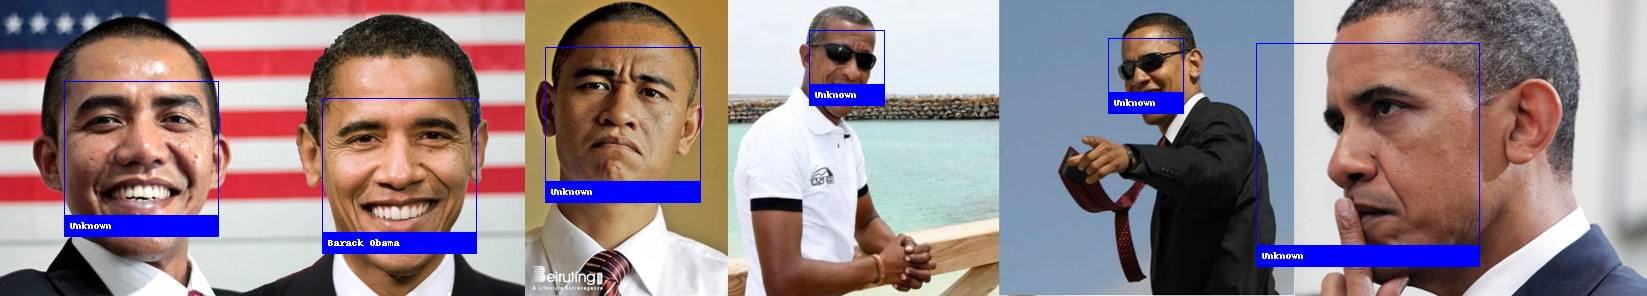

In [30]:
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.
import face_recognition
from PIL import Image, ImageDraw
import numpy as np



# Load a sample picture and get the feature.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and get the feature.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face feature and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("obama_group.jpg")

# Find all the faces and face features in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance=0.35)
    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
pil_image.save("image_with_boxes.jpg")